In [1]:
%%time
import malaya

CPU times: user 4.56 s, sys: 998 ms, total: 5.55 s
Wall time: 5.5 s


In [2]:
anger_text = 'babi la company ni, aku dah la penat datang dari jauh'
fear_text = 'takut doh tengok cerita hantu tadi'
happy_text = 'bestnya dapat tidur harini, tak payah pergi kerja'
love_text = 'aku sayang sgt dia dah doh'
sadness_text = 'kecewa tengok kerajaan baru ni, janji ape pun tak dapat'
surprise_text = 'sakit jantung aku, terkejut dengan cerita hantu tadi'

## Get label

In [3]:
malaya.emotion.label

['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']

All models follow same method as sklearn interface, `predict` to get batch of labels, `predict_proba` to get batch of probabilities.

## Load multinomial model

All model interface will follow sklearn interface started v3.4,

```python
model.predict(List[str])

model.predict_proba(List[str])
```

In [5]:
model = malaya.emotion.multinomial()

In [6]:
model.predict([anger_text])

['anger']

In [8]:
model.predict(
    [anger_text, fear_text, happy_text, love_text, sadness_text, surprise_text]
)

['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']

In [9]:
model.predict_proba(
    [anger_text, fear_text, happy_text, love_text, sadness_text, surprise_text]
)

[{'anger': 0.32948272681734814,
  'fear': 0.13959708810717708,
  'happy': 0.14671455153216045,
  'love': 0.12489192355631354,
  'sadness': 0.1285972541671178,
  'surprise': 0.13071645581988448},
 {'anger': 0.11379406005377896,
  'fear': 0.4006934391283133,
  'happy': 0.11389665647702245,
  'love': 0.12481915233837086,
  'sadness': 0.0991261507380643,
  'surprise': 0.14767054126445014},
 {'anger': 0.15051890586527464,
  'fear': 0.13931406415515296,
  'happy': 0.32037710031973415,
  'love': 0.13747954667255546,
  'sadness': 0.11565866743099411,
  'surprise': 0.13665171555628927},
 {'anger': 0.1590563839629243,
  'fear': 0.14687344690114268,
  'happy': 0.1419948160674701,
  'love': 0.279550441361504,
  'sadness': 0.1285927908584157,
  'surprise': 0.14393212084854254},
 {'anger': 0.14268176425895224,
  'fear': 0.12178299725318226,
  'happy': 0.16187751258299898,
  'love': 0.1030494733572262,
  'sadness': 0.34277869755707796,
  'surprise': 0.1278295549905621},
 {'anger': 0.06724850384395685

## List available Transformer models

In [2]:
malaya.emotion.available_transformer()

{'bert': ['425.6 MB', 'accuracy: 0.992'],
 'tiny-bert': ['57.4 MB', 'accuracy: 0.988'],
 'albert': ['48.6 MB', 'accuracy: 0.997'],
 'tiny-albert': ['22.4 MB', 'accuracy: 0.981'],
 'xlnet': ['446.5 MB', 'accuracy: 0.990'],
 'alxlnet': ['46.8 MB', 'accuracy: 0.989']}

Make sure you can check accuracy chart from here first before select a model, https://malaya.readthedocs.io/en/latest/Accuracy.html#emotion-analysis

**You might want to use Tiny-Albert, a very small size, 22.4MB, but the accuracy is still on the top notch.**

## Load Albert model

All model interface will follow sklearn interface started v3.4,

```python
model.predict(List[str])

model.predict_proba(List[str])
```

In [3]:
model = malaya.emotion.transformer(model = 'albert')




INFO:tensorflow:loading sentence piece model



#### Predict batch of strings

In [16]:
model.predict_proba(
    [anger_text, fear_text, happy_text, love_text, sadness_text, surprise_text]
)

[{'anger': 0.9998901,
  'fear': 3.2524113e-05,
  'happy': 2.620931e-05,
  'love': 2.2871463e-05,
  'sadness': 9.782951e-06,
  'surprise': 1.8502667e-05},
 {'anger': 1.6941378e-05,
  'fear': 0.9999205,
  'happy': 9.070281e-06,
  'love': 2.044179e-05,
  'sadness': 6.7731107e-06,
  'surprise': 2.6314676e-05},
 {'anger': 0.15370166,
  'fear': 0.0013852724,
  'happy': 0.8268689,
  'love': 0.011433229,
  'sadness': 0.0011807577,
  'surprise': 0.005430276},
 {'anger': 1.2597201e-05,
  'fear': 1.7600481e-05,
  'happy': 9.667115e-06,
  'love': 0.9999331,
  'sadness': 1.3735416e-05,
  'surprise': 1.3399296e-05},
 {'anger': 1.9176923e-05,
  'fear': 1.1163729e-05,
  'happy': 6.353941e-06,
  'love': 7.004002e-06,
  'sadness': 0.99994576,
  'surprise': 1.0511084e-05},
 {'anger': 5.8739704e-05,
  'fear': 1.9771342e-05,
  'happy': 1.8316741e-05,
  'love': 2.2319455e-05,
  'sadness': 3.646786e-05,
  'surprise': 0.9998443}]

#### Open emotion visualization dashboard

Default when you call `predict_words` it will open a browser with visualization dashboard, you can disable by `visualization=False`.

In [ ]:
model.predict_words(sadness_text)

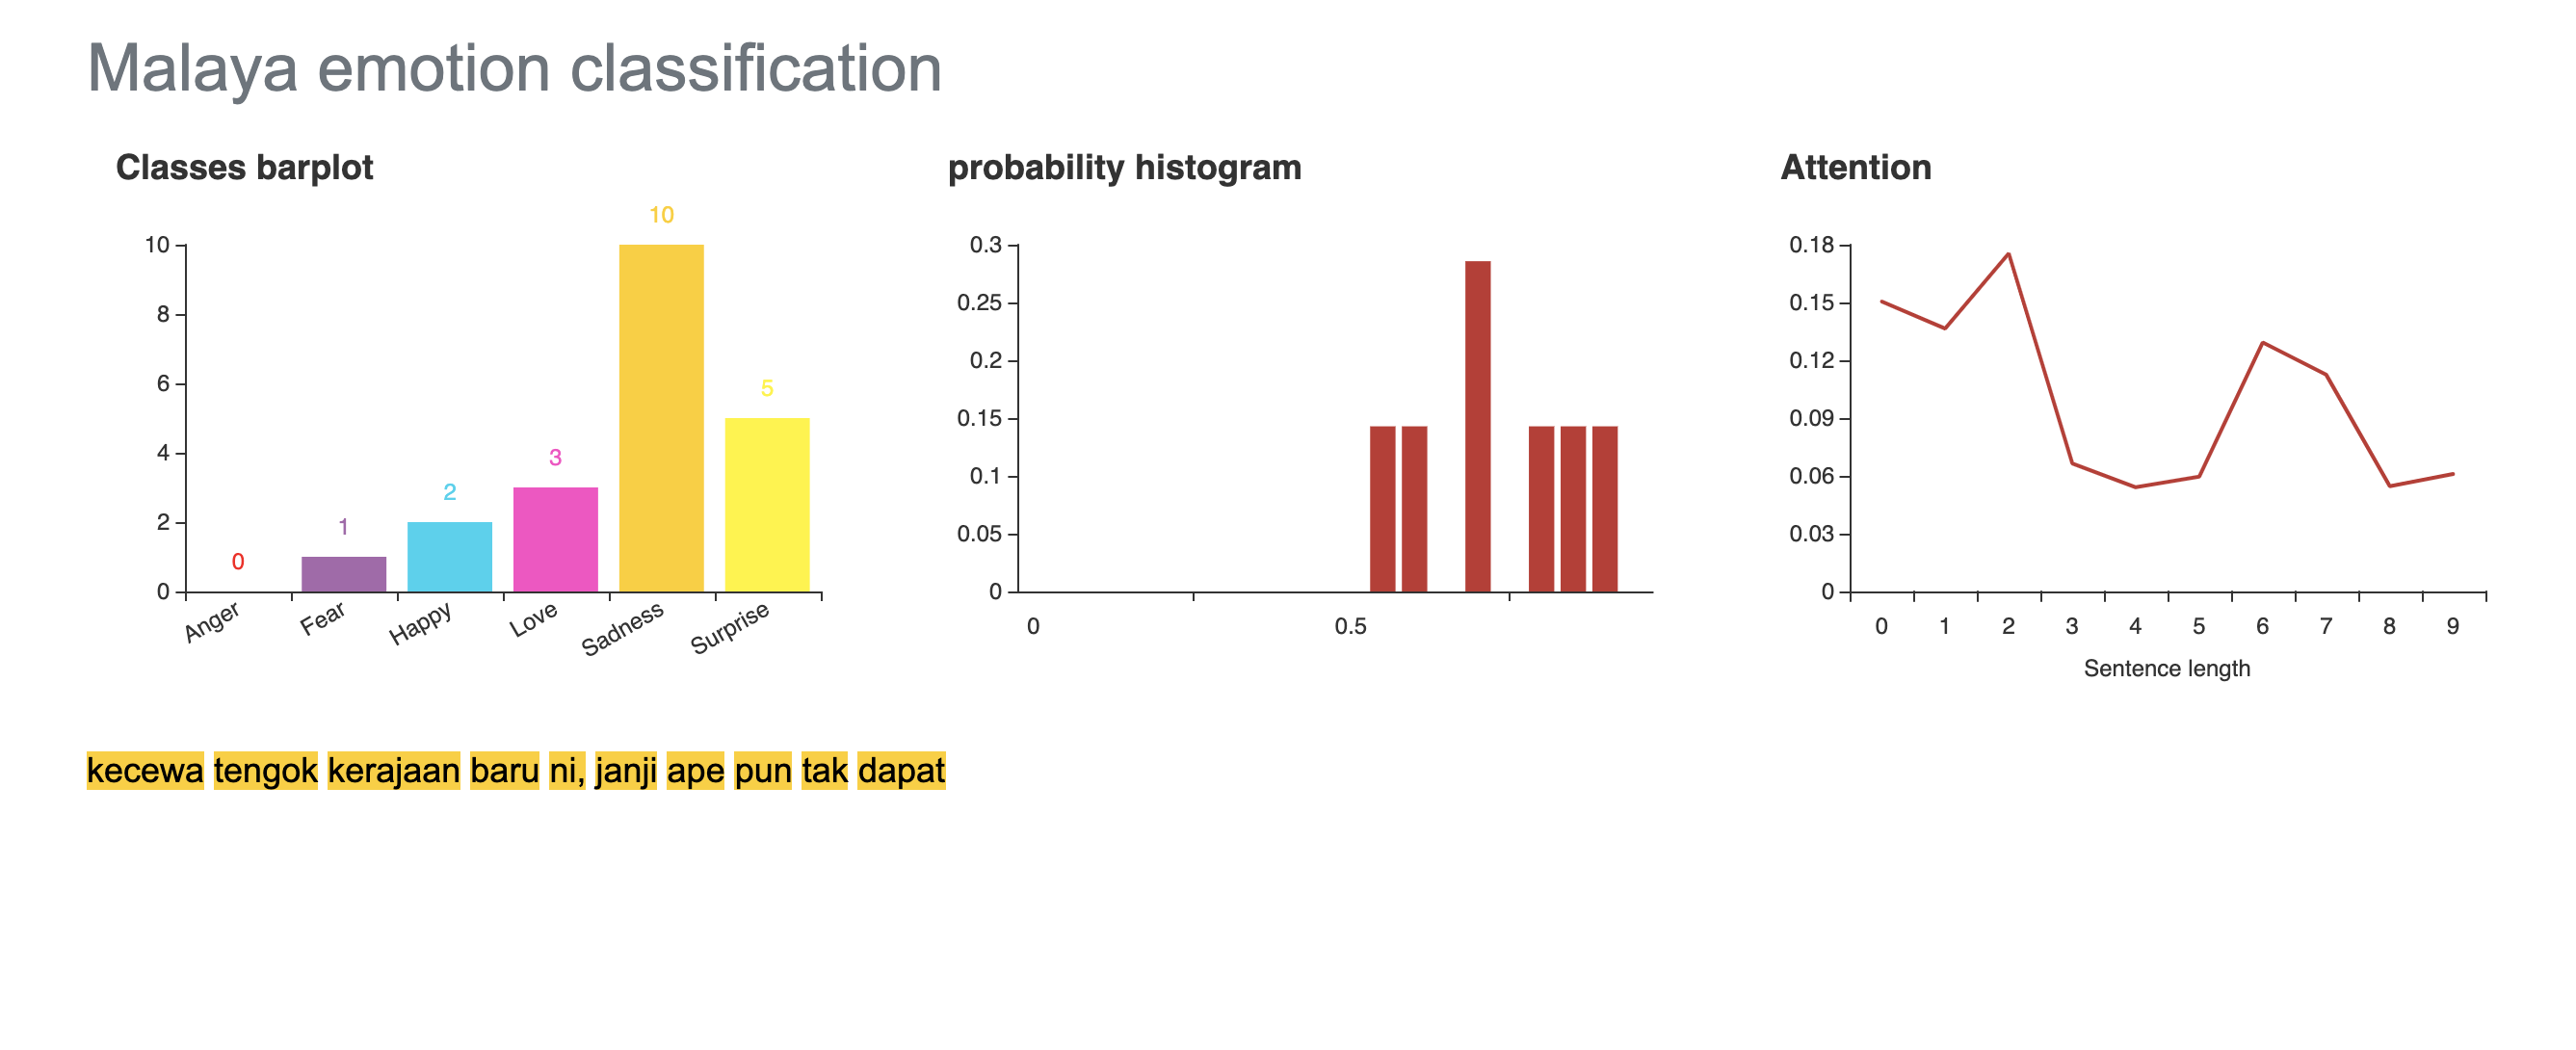

In [18]:
from IPython.core.display import Image, display

display(Image('emotion-dashboard.png', width=800))

## Stacking models

More information, you can read at [https://malaya.readthedocs.io/en/latest/Stack.html](https://malaya.readthedocs.io/en/latest/Stack.html)

In [4]:
multinomial = malaya.emotion.multinomial()

In [6]:
malaya.stack.predict_stack([multinomial, model], [anger_text])

[{'anger': 0.5739743139312979,
  'fear': 0.002130791264743306,
  'happy': 0.0019609404077070573,
  'love': 0.0016901068202818533,
  'sadness': 0.001121633002361737,
  'surprise': 0.0015551851123993595}]

In [7]:
malaya.stack.predict_stack([multinomial, model], [anger_text, sadness_text])

[{'anger': 0.5739743139312979,
  'fear': 0.002130791264743306,
  'happy': 0.0019609404077070573,
  'love': 0.0016901068202818533,
  'sadness': 0.001121633002361737,
  'surprise': 0.0015551858768478731},
 {'anger': 0.0016541454680912208,
  'fear': 0.0011659984542562358,
  'happy': 0.001014179551389293,
  'love': 0.0008495638318424924,
  'sadness': 0.5854571761989077,
  'surprise': 0.001159149836587787}]